In [1]:
import data_loader as dl

In [2]:
#this cell can be ignored
file_info_dict = dl.createFileInfoDict("/Net/elnino/data/obs/ERA5/global/daily/")

dataset = dl.NetCDFDataset(file_info_dict, "/Net/elnino/data/obs/ERA5/global/daily/")
ds = dataset.__getitem__(2002, 10)
print(ds)

[tensor([[[[-1.1425e+00,  1.8990e-01,  8.6997e-01,  ..., -4.5962e-01,
            8.6422e-01, -1.0716e+00],
          [-1.2028e+00,  2.6148e-01,  8.4460e-01,  ..., -5.6007e-01,
            8.7421e-01, -1.0905e+00],
          [-1.2594e+00,  3.8564e-01,  8.1963e-01,  ..., -6.5323e-01,
            8.7452e-01, -1.0941e+00],
          ...,
          [-1.3389e+00,  4.9242e+00,  8.0422e-01,  ...,  2.5350e+00,
            2.1431e-01,  2.4429e+00],
          [-1.3278e+00,  4.7891e+00,  7.6586e-01,  ...,  2.4209e+00,
            1.9823e-01,  2.4634e+00],
          [-1.3138e+00,  7.9867e+00,  6.6777e-01,  ...,  2.1826e+00,
            1.8728e-01,  2.3821e+00]],

         [[-1.0260e+00, -9.7135e-02,  8.8930e-01,  ..., -3.0322e-01,
            7.4071e-01, -1.0461e+00],
          [-1.0838e+00, -5.4043e-02,  8.9217e-01,  ..., -3.5600e-01,
            7.5499e-01, -1.0847e+00],
          [-1.1425e+00,  3.7253e-02,  8.7303e-01,  ..., -4.4115e-01,
            7.6303e-01, -1.1377e+00],
          ...,
    

In [8]:
file_info_dict = dl.createFileInfoDict("/Net/elnino/data/obs/ERA5/global/daily/")

dataset = dl.NetCDFDataset(file_info_dict, "/Net/elnino/data/obs/ERA5/global/daily/")

tensors = []
val_tensors = []
for year in range(2000,2020):
    for offst in range(1,11):
        tensors.append(dataset.__getitem__(year, offst))

for year in range(1993,1999):
    for offst in range(1,11):
        tensors.append(dataset.__getitem__(year, offst))



def get_dimensions(lst):
    if isinstance(lst, list):
        return [len(lst)] + get_dimensions(lst[0])
    else:
        return []
    
print(get_dimensions(tensors))
  

[260, 2]


In [9]:
import torch
tensors[1][1]
#tensor is a list of 200 lists, each of those 200 lists have 2 element, 1 one being a tensor
#the other element being a number


# Given 'tensors', a list of 200 lists, each containing a tensor and a number
# Initialize empty lists for tensors and numbers
x_train = []
y_train = []

x_val = []
y_val = []

# Iterate over each inner list
for tensor, number in tensors:
    # Append the tensor to x_train
    x_train.append(tensor)
    # Append the number to y_train
    y_train.append(float(number))

# Iterate over each inner list
for tensor, number in tensors:
    # Append the tensor to x_train
    x_val.append(tensor)
    # Append the number to y_train
    y_val.append(float(number))

# Convert lists to tensors if needed
x_train = torch.stack(x_train)
y_train = torch.tensor(y_train)
x_val = torch.stack(x_val)
y_val = torch.tensor(y_val)

print("x_train shape:", x_train.shape)
print("y train shape:", y_train.shape)
print("y_train[2] type:", y_train[2].type)
print(type(y_train[2].item()))

#200 observations, 6 days, 37 * 41 lat long, 7 variables

x_train shape: torch.Size([260, 6, 37, 41, 7])
y train shape: torch.Size([260])
y_train[2] type: <built-in method type of Tensor object at 0x7f856a3cfec0>
<class 'float'>


In [5]:
#old cnn; can be ignored
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=6, out_channels=16, kernel_size=(3, 3, 3))
        self.conv2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(3, 3, 3))
        self.fc1 = nn.Linear(3, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        print("After conv layer 1:", x.shape)
        x = F.relu(self.conv2(x))
        print("After conv layer 2:", x.shape)
        #x = x.view(-1, 32 * 35 * 39 * 5)
        x = F.relu(self.fc1(x))
        print("After linear layer 1:", x.shape)
        x = self.fc2(x)
        print("After linear layer 2:", x.shape)
        return x

# Initialize the model
model = SimpleCNN()

# Print the model architecture
print(model)

SimpleCNN(
  (conv1): Conv3d(6, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (conv2): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (fc1): Linear(in_features=3, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [11]:
#updated CNN as of 2.26

class SimpleCNN(nn.Module):
    def __init__(self, p=0.25):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=6, out_channels=16, kernel_size=(3, 3, 3))
        self.conv2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(3, 3, 3))
        self.fc1 = nn.Linear(32, 128) 
        self.fc2 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print("After conv layer 1:", x.shape)
        x = F.relu(self.conv2(x))
        #print("After conv layer 2:", x.shape)
        
        # Perform global average pooling along spatial dimensions
        x = F.avg_pool3d(x, kernel_size=x.size()[2:])
        #print("After global pooling:", x.shape)
        
        x = x.view(-1, 32)  # Flatten the output for the linear layer
        x = F.relu(self.fc1(x))
        #print("After linear layer 1:", x.shape)
        x = self.dropout(x)
        x = self.fc2(x)
        #print("After linear layer 2:", x.shape)
        #print("Type:", type(x))
        #print("output:", x)
        return x
    
# Initialize the modified model
model = SimpleCNN()

# Print the modified model architecture
print(model)

SimpleCNN(
  (conv1): Conv3d(6, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (conv2): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (fc1): Linear(in_features=32, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [12]:
import torch.optim as optim

# Define your loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

# Define your optimizer (Adam optimizer with learning rate 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
epochs = 100
mc_samples = 50
outputs = 0

predicted_outputs = []
true_values = []

# Training loop
for epoch in range(epochs):
    # Set model to training mode
    model.train()
    
    all_outputs = torch.zeros((mc_samples, len(x_train)))

    for i in range(mc_samples):
        outputs = model(x_train)
        all_outputs[i] = outputs.squeeze() 
    
    # Compute mean and variance across dropout samples
    mean_prediction = all_outputs.mean(dim=0)
    prediction_variance = all_outputs.var(dim=0)

    # Append predicted outputs and true values
    predicted_outputs.extend(outputs.tolist())  # Convert to list and extend the list
    true_values.extend(y_train.tolist())  
    
    # Compute the loss
    loss = criterion(mean_prediction, y_train)
    
    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

    # Validation
    if (epoch + 1) % 10 == 0:
        # Set model to evaluation mode
        model.eval()
        
        all_val_outputs = torch.zeros((mc_samples, len(x_val)))
        
        for i in range(mc_samples):
            val_outputs = model(x_val)
            all_val_outputs[i] = val_outputs.squeeze()

        mean_val_prediction = all_val_outputs.mean(dim=0)
        val_prediction_variance = all_val_outputs.var(dim=0)

        # Compute validation loss
        val_loss = criterion(mean_val_prediction, y_val)
        
        # Print validation loss
        print(f'Validation Epoch [{epoch + 1}/{epochs}], Loss: {val_loss.item()}')

#print(outputs)
#print("Predicted Outputs:", predicted_outputs)
#print("True Values:", true_values)

Epoch [10/100], Loss: 22485.498046875
Validation Epoch [10/100], Loss: 22427.541015625
Epoch [20/100], Loss: 21174.94140625
Validation Epoch [20/100], Loss: 20918.533203125
Epoch [30/100], Loss: 16828.978515625
Validation Epoch [30/100], Loss: 16125.107421875
Epoch [40/100], Loss: 7552.85498046875
Validation Epoch [40/100], Loss: 6436.751953125
Epoch [50/100], Loss: 382.3418884277344
Validation Epoch [50/100], Loss: 560.5641479492188
Epoch [60/100], Loss: 918.7127075195312
Validation Epoch [60/100], Loss: 693.0789184570312
Epoch [70/100], Loss: 463.0874938964844
Validation Epoch [70/100], Loss: 487.8003845214844
Epoch [80/100], Loss: 290.83489990234375
Validation Epoch [80/100], Loss: 266.1540222167969
Epoch [90/100], Loss: 281.1233825683594
Validation Epoch [90/100], Loss: 271.19781494140625
Epoch [100/100], Loss: 219.07965087890625
Validation Epoch [100/100], Loss: 219.18080139160156


<xarray.DataArray 'mslp' (time: 6, latitude: 37, longitude: 41)>
[9102 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2002-05-21 2002-05-22 ... 2002-05-26
  * latitude   (latitude) float32 24.0 24.25 24.5 24.75 ... 32.5 32.75 33.0
  * longitude  (longitude) float32 272.0 272.2 272.5 272.8 ... 281.5 281.8 282.0
Attributes:
    units:                   Pa
    long_name:               Mean sea level pressure
    standard_name:           air_pressure_at_mean_sea_level
    _FillValue_original:     -32767
    missing_value_original:  -32767
    time:                    894120
    NCL_tag:                 calculate_daily_values: arith=avg


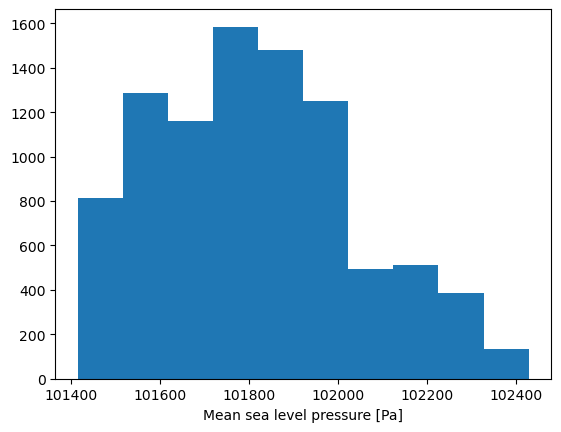

In [10]:
import xarray as xr
#import netCDF4 as nc
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import torch
print(ds['mslp'])

ds['mslp'].plot()
plt.show()

ds.close()

<xarray.DataArray 't2m' (time: 6, latitude: 37, longitude: 41)>
[9102 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2002-05-21 2002-05-22 ... 2002-05-26
  * latitude   (latitude) float32 24.0 24.25 24.5 24.75 ... 32.5 32.75 33.0
  * longitude  (longitude) float32 272.0 272.2 272.5 272.8 ... 281.5 281.8 282.0
Attributes:
    units:                   K
    long_name:               2 metre temperature
    _FillValue_original:     -32767
    missing_value_original:  -32767
    time:                    894120
    NCL_tag:                 calculate_daily_values: arith=avg


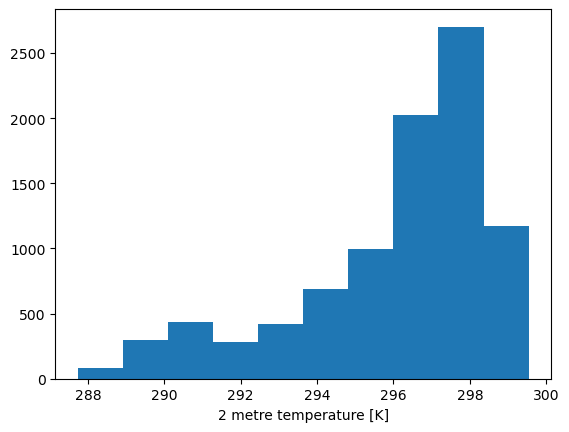

In [11]:
print(ds['t2m'])

ds['t2m'].plot()
plt.show()

ds.close()

<xarray.DataArray 'tp' (time: 6, latitude: 37, longitude: 41)>
[9102 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2002-05-21 2002-05-22 ... 2002-05-26
  * latitude   (latitude) float32 24.0 24.25 24.5 24.75 ... 32.5 32.75 33.0
  * longitude  (longitude) float32 272.0 272.2 272.5 272.8 ... 281.5 281.8 282.0
Attributes:
    units:                   m
    long_name:               Total precipitation
    _FillValue_original:     -32767
    missing_value_original:  -32767
    time:                    894120
    NCL_tag:                 calculate_daily_values: arith=avg


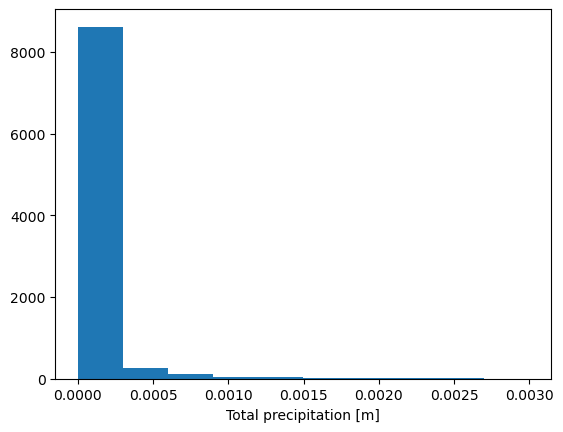

In [12]:
print(ds['tp'])

ds['tp'].plot()
plt.show()

ds.close()

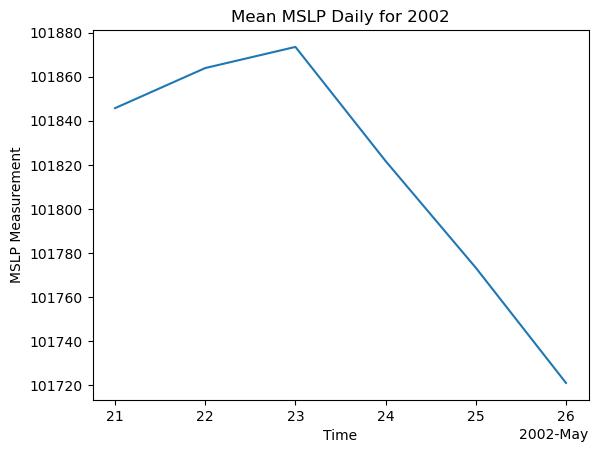

In [13]:
import matplotlib.pyplot as plt



mean_mslp = ds['mslp'].mean(dim=('latitude', 'longitude'))
mean_mslp.plot.line(x='time')
plt.title('Mean MSLP Daily for 2002')
plt.xlabel('Time')
plt.ylabel('MSLP Measurement')
plt.show()

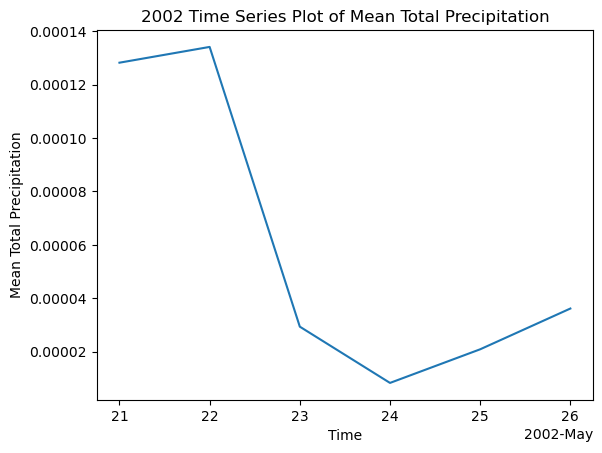

In [14]:
mean_tp = ds['tp'].mean(dim=('latitude', 'longitude'))
mean_tp.plot.line(x='time')
plt.title('2002 Time Series Plot of Mean Total Precipitation')
plt.xlabel('Time')
plt.ylabel('Mean Total Precipitation')
plt.show()

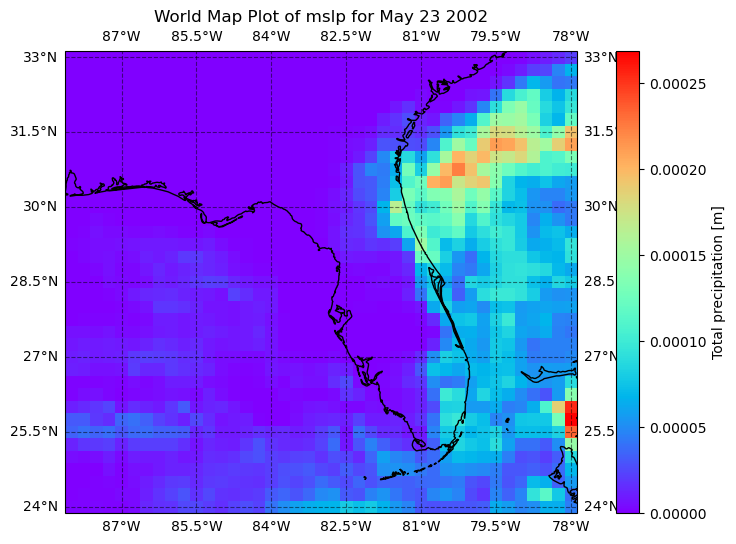

In [15]:


import cartopy.crs as ccrs

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 6))

ds_ex_tp_transposed = ds.transpose('time', 'latitude', 'longitude')

ds_one_day = ds_ex_tp_transposed.sel(time='2002-05-23')

ds_one_day
ds_one_day['tp'].plot.pcolormesh(ax=ax, transform=projection, cmap='rainbow', x='longitude', y='latitude', add_colorbar=True)



ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', color='black', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.title('Map Plot of mslp for May 23 2002')
plt.show()

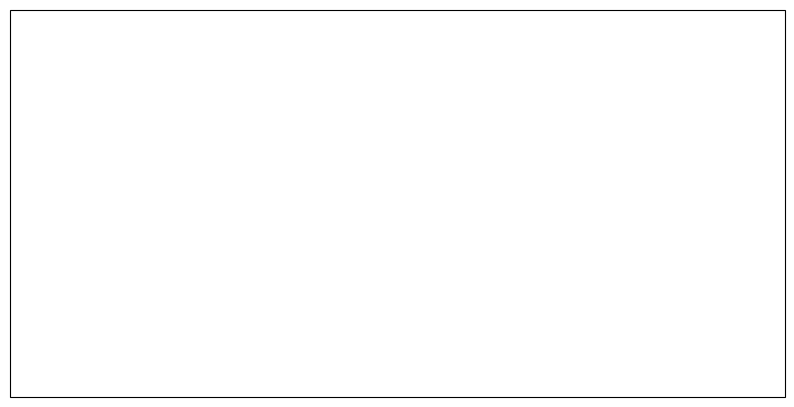

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import xarray as xr

projection = ccrs.PlateCarree()
dates = ['2002-05-21', '2002-05-22','2002-05-23','2002-05-24','2002-05-25','2002-05-26']
for i in range(6):

    fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 6))

    ds_ex_tp_transposed = ds.transpose('time', 'latitude', 'longitude')

    ds_one_day = ds_ex_tp_transposed.sel(time=dates[i])

    ds_one_day
    ds_one_day['tp'].plot.pcolormesh(ax=ax, transform=projection, cmap='rainbow', x='longitude', y='latitude', add_colorbar=True)
 

    ax.coastlines()
    ax.gridlines(draw_labels=True, linestyle='--', color='black', alpha=0.5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')


    #plt.title('Map Plot of mslp for May 23 2002')
    #plt.show()

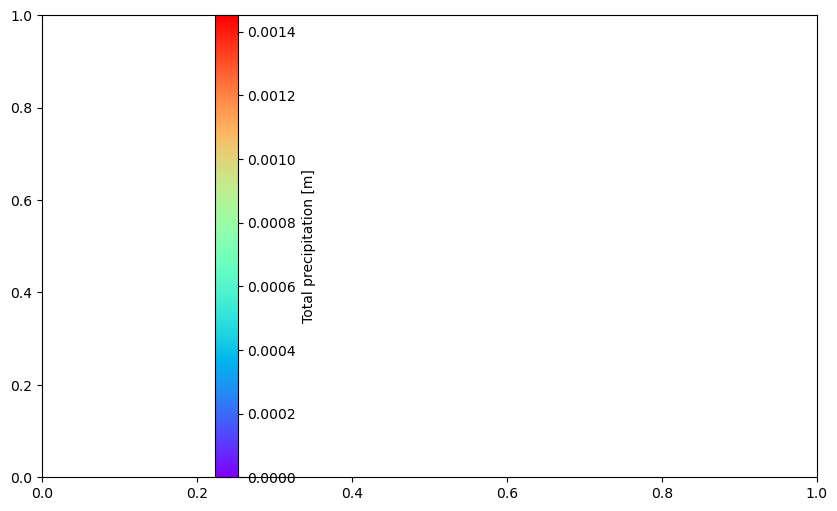

In [19]:
# Define the projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 6))



dates = ['2002-05-21', '2002-05-22','2002-05-23','2002-05-24','2002-05-25','2002-05-26']

# Define a function to update the plot for each frame of the animation
def update(frame):
    plt.clf()  # Clear the previous plot
    ds_ex_tp_transposed = ds.transpose('time', 'latitude', 'longitude')
    ds_one_day = ds_ex_tp_transposed.sel(time=dates[frame])
    ds_one_day
    ds_one_day['tp'].plot.pcolormesh(ax=ax, transform=projection, cmap='rainbow', x='longitude', y='latitude', add_colorbar=True)
    ax.coastlines()
    ax.gridlines(draw_labels=True, linestyle='--', color='black', alpha=0.5)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Map Plot of TP for {str(dates[frame])[:10]}')

# Set up the animation
ani = FuncAnimation(fig, update, frames=6, interval=1000, repeat=False)
ani.save('animation.mp4')

# Show the animation
plt.show()

In [21]:
ds1 = dataset.__getitem__(2003)
ds2 = dataset.__getitem__(2004)

data_array1 = ds1.to_array().values
data_array2 = ds2.to_array().values

# Concatenate the data arrays along a new dimension
concatenated_data = np.concatenate([data_array1, data_array2], axis=0)

# Convert the concatenated data to a torch tensor
torch_tensor = torch.tensor(concatenated_data)

# Print the shape of the torch tensor
print(torch_tensor.shape)

torch.Size([14, 6, 37, 41])
